In [ ]:
# 2023-01
# understanding the abc conjecture

In [59]:
!ipython -m pip install tqdm

]0;IPython: projects/ipyDefaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.1 MB/s eta 0:00:00


In [68]:
import sympy
from functools import reduce, partial
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [101]:
from matplotlib.patches import Rectangle

In [323]:
def fixplot():
    fig, ax = plt.subplots()
    ax.set_aspect(1)

In [341]:
def fixbin(*args, ratio=1, plot="hex", gridscale=100, fig=None, ax=None):
    if fig is None or ax is None:
        fig, ax = plt.subplots()
    
    if plot == "hex":
        plt.hexbin(*args, 
                   mincnt=1, 
                   linewidth=36/fig.get_dpi(),
                   gridsize=(int(gridscale/np.sqrt(ratio)), int(gridscale*np.sqrt(ratio/3))))
    else:
        plot(*args)
    
    #get x and y limits
    x_left, x_right = ax.get_xlim()
    y_low, y_high = ax.get_ylim()
    ax.set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)
    
    plt.show()

In [69]:
tq = partial(tqdm, position=0)

In [1]:
with open('/home/adam/Downloads/abctriples_below_1018') as f:
    lines = f.readlines()

In [5]:
lines[2].strip().split()

['49', '1']

In [6]:
pairs = [tuple(map(int, line.strip().split())) for line in lines]

In [7]:
pairs[:5]

[(9, 1), (32, 5), (49, 1), (64, 1), (81, 1)]

In [197]:
def rad(c, a):
    a, b, c = a, c-a, c
    facs = [sympy.factorint(x) for x in (a,b,c)]
    prims = set(p for d in facs for p in d)
    return reduce(lambda x,y:x*y, prims, 1)

In [198]:
def qual(c, a):
    return np.log(c) / np.log(rad(c, a))

In [58]:
all([pairs[i][0] <= pairs[i+1][0] for i in range(len(pairs)-1)])

True

In [70]:
rads = [rad(*p) for p in tq(pairs[:100_000])]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:08<00:00, 11775.29it/s]


In [89]:
sizes = [p[0] for p in pairs[:100_000]]

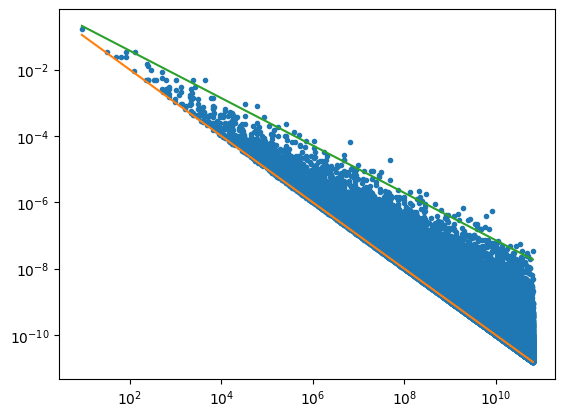

In [97]:
plt.loglog(sizes, 1/np.array(rads), linestyle='None', marker='.')
plt.plot(sizes, 1/np.array(sizes))
plt.plot(sizes, np.array(sizes)**(-1/1.4))

In [103]:
?Rectangle

In [278]:
def drawboxes(ps):
    rects = []
    for p in ps:
        rect = Rectangle(
            (5, 1e-11), (p[0]-5), (1/rad(*p)-1e-11),
            facecolor=[0,
                       .5+.5*np.random.rand(), 
                       .5+.5*np.random.rand()], 
            alpha=1)
        rects.append(rect)
    return rects

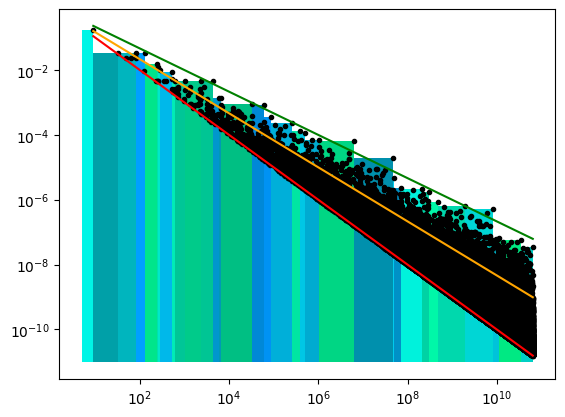

In [313]:
fig, ax = plt.subplots()
ax.loglog(sizes, 1/np.array(rads), 
          "black",
          linestyle='None', 
          marker='.'
         )
plt.plot(sizes, 1/np.array(sizes), 'red')
plt.plot(sizes, 1/np.array(sizes)**(1/1.2), 'orange')
plt.plot(sizes, 1/np.array(sizes)**(1/1.5), 'green')
# fsizes = [p[0] for (p, _) in frontier]
# frads = [r for (_, r) in frontier]
# ax.loglog(fsizes, 1/np.array(frads), linestyle='None', marker='.')
for box in drawboxes(reversed([p for (p,r) in frontier])):
    ax.add_patch(box)
plt.show()

In [280]:
len(frontier)

40

In [248]:
def sancheck(fron):
    for p1, r1 in fron:
        for p2, r2 in fron:
            if p1[0] < p2[0] and r1 > r2:
                print(p1, r1)
                print(p2, r2)
                print(fron)
                print('!!!')

In [252]:
sancheck(frontier)

In [255]:
frontier = []
for pair1, rad1 in tq(zip(pairs[:100_000], rads)):
    if all([pair1[0]>=pair2[0] or rad1<=rad2
            for (pair2, rad2) in frontier]):
        for (pair2, rad2) in frontier.copy():
            if pair1[0]>pair2[0] and rad1<rad2:
#                 print(pair1, rad1)
#                 print(pair2, rad2)
#                 print(frontier)
#                 print('???')
                frontier.remove((pair2, rad2))
        frontier.append((pair1, rad1))
#         sancheck(frontier)

100000it [00:00, 108465.66it/s]


In [98]:
quals = [qual(*p) for p in tq(pairs[:100_000])]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:08<00:00, 11151.13it/s]


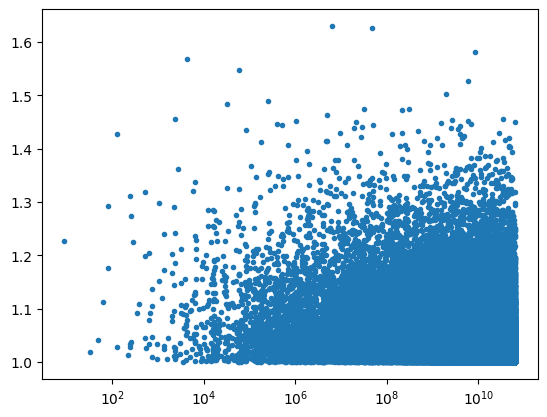

In [99]:
plt.semilogx(sizes, np.array(quals), linestyle='None', marker='.')
# plt.plot(sizes, 1/np.array(sizes))
# plt.plot(sizes, np.array(sizes)**(-1/1.4))

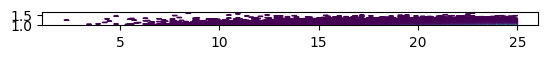

In [340]:
fixplot()
plt.hexbin((np.log(np.array(sizes))), 
           np.array(quals), 
           mincnt=1, gridsize=100)
plt.show()

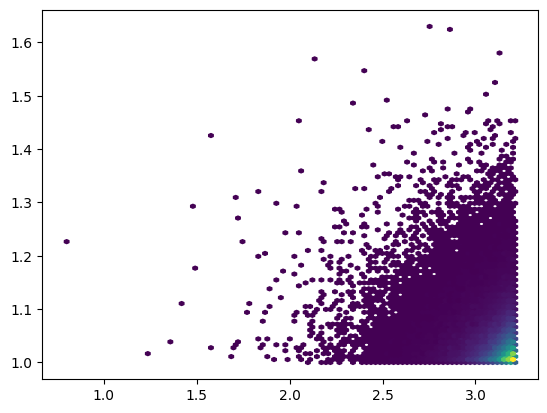

In [330]:
plt.hexbin(np.log(np.log(np.array(sizes))), 
           np.array(quals), mincnt=1, gridsize=100)
plt.show()

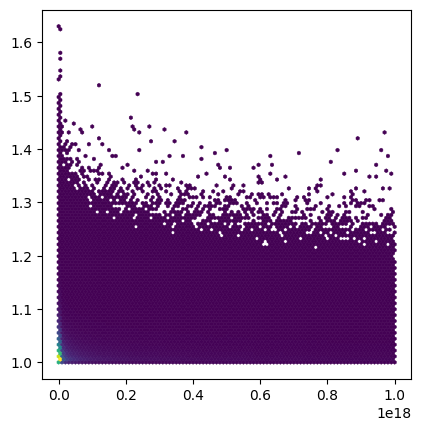

In [343]:
fixbin([p[0] for p in pairs[:]], 
       np.array(qualsall),
      ratio=2.0)

In [88]:
max([qual(*p) for p in tq(pairs[:100_000])])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [00:08<00:00, 11213.25it/s]


1.6299116841270482

In [281]:
rads1e6 = [rad(*p) for p in tq(pairs[:1_000_000])]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000000/1000000 [02:51<00:00, 5814.01it/s]


In [287]:
quals1e6 = [np.log(p[0])/np.log(r)
            for p, r in tq(zip(pairs[:1_000_000], rads1e6))]

1000000it [00:02, 468300.04it/s]


In [309]:
radsall = [rad(*p) for p in tq(pairs[:])]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 14482065/14482065 [1:09:48<00:00, 3457.20it/s]


In [310]:
qualsall = [np.log(p[0])/np.log(r)
            for p, r in tq(zip(pairs[:], radsall))]

14482065it [00:33, 438512.19it/s]


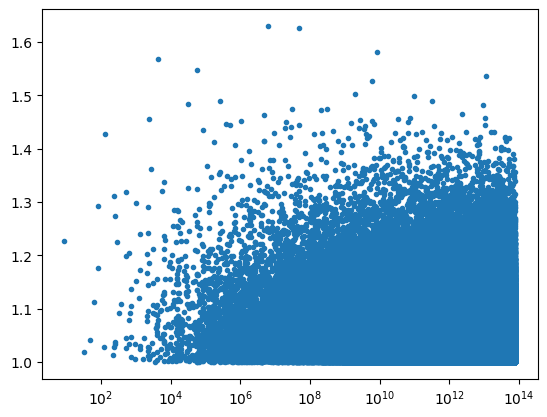

In [289]:
plt.semilogx([p[0] for p in pairs[:1_000_000]], 
             np.array(quals1e6), 
             linestyle='None', marker='.')

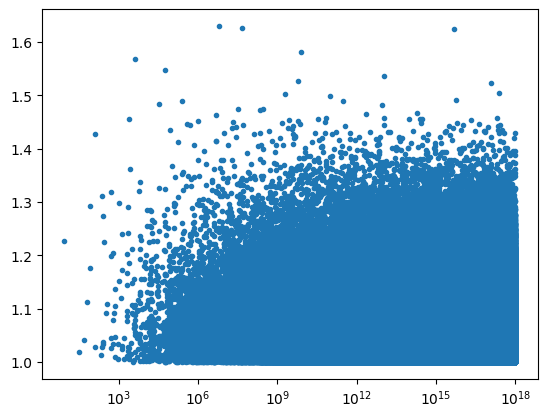

In [314]:
plt.semilogx([p[0] for p in pairs[:]], 
             np.array(qualsall), 
             linestyle='None', marker='.')

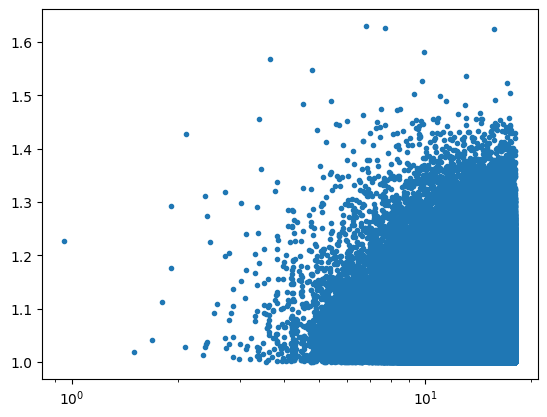

In [316]:
plt.semilogx([np.log10(p[0]) for p in pairs], 
             np.array(qualsall), 
             linestyle='None', marker='.')

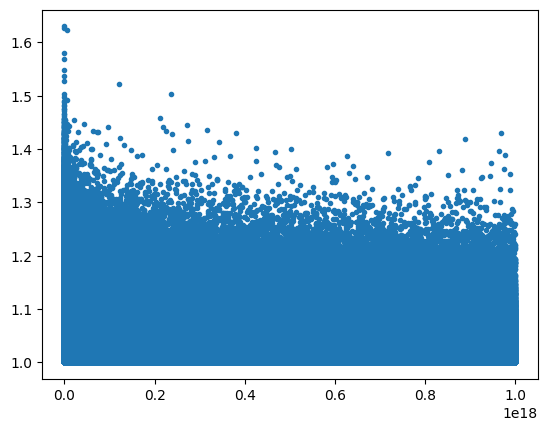

In [317]:
plt.plot([(p[0]) for p in pairs], 
             np.array(qualsall), 
             linestyle='None', marker='.')

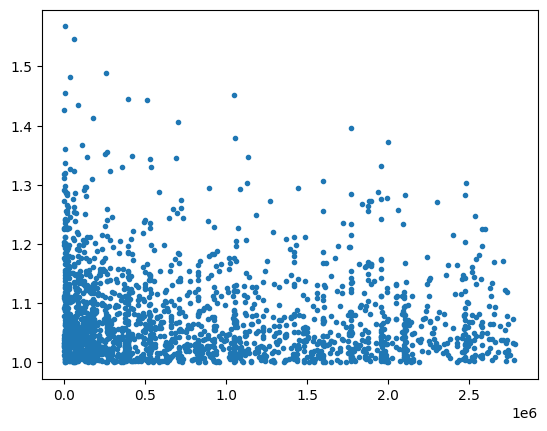

In [322]:
plt.plot([(p[0]) for p in pairs[:2_000]], 
             np.array(qualsall[:2_000]), 
             linestyle='None', marker='.')

In [306]:
[pairs[i-1] for i in [1,5,8,52,79,2880]]

[(9, 1), (81, 1), (128, 3), (2401, 1), (4375, 1), (6436343, 2)]

In [298]:
[p for p,_ in frontier if qual(*p) >1.6]

[(6436343, 2), (48234496, 121)]

In [305]:
[i for i in range(1,10**7) if pairs[i-1]==(6436343,2)]

[2880]